<a href="https://colab.research.google.com/github/garrisonreid/CHHS-Mini-Projects/blob/master/Example_NFL_QB_Pass_Location_Heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NFL Pass Location Visualization**
- **Source:** https://www.opensourcefootball.com/posts/2020-08-22-nfl-pass-location-visualization/
- **Seaborn Documentation** http://seaborn.pydata.org/generated/seaborn.jointplot.html
- **matplotlib Colormap Options:**
https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

## **Import packages**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## **Import data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ArrowheadAnalytics/next-gen-scrapy-2.0/master/pass_and_game_data.csv', low_memory=False)
#There's an additional index row we don't need, so I am getting rid of it here
df = df.iloc[0:,1:]
#Drop the games that weren't able to be scraped
df.dropna(inplace=True)
#Explore the data a bit
df.head()

,week,name,pass_type,x,y,season,game_id,game_type,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,overtime,old_game_id,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_coach,home_coach,referee,stadium_id,stadium,defteam
9922,12,Joseph Flacco,COMPLETE,1.4,2.0,2017,2017_12_HOU_BAL,REG,2017-11-27,Monday,20:30,HOU,16.0,BAL,23.0,Home,7.0,39.0,0.0,2017112700,8,8,311.0,-357.0,7.5,-103.0,-107.0,39.5,-102.0,-108.0,0,outdoors,grass,50.0,1.0,Bill O'Brien,John Harbaugh,Brad Allen,BAL00,M&T Bank Stadium,HOU
9923,12,Joseph Flacco,COMPLETE,12.6,-6.6,2017,2017_12_HOU_BAL,REG,2017-11-27,Monday,20:30,HOU,16.0,BAL,23.0,Home,7.0,39.0,0.0,2017112700,8,8,311.0,-357.0,7.5,-103.0,-107.0,39.5,-102.0,-108.0,0,outdoors,grass,50.0,1.0,Bill O'Brien,John Harbaugh,Brad Allen,BAL00,M&T Bank Stadium,HOU
9924,12,Joseph Flacco,COMPLETE,-11.1,-0.1,2017,2017_12_HOU_BAL,REG,2017-11-27,Monday,20:30,HOU,16.0,BAL,23.0,Home,7.0,39.0,0.0,2017112700,8,8,311.0,-357.0,7.5,-103.0,-107.0,39.5,-102.0,-108.0,0,outdoors,grass,50.0,1.0,Bill O'Brien,John Harbaugh,Brad Allen,BAL00,M&T Bank Stadium,HOU
9925,12,Joseph Flacco,COMPLETE,18.3,8.1,2017,2017_12_HOU_BAL,REG,2017-11-27,Monday,20:30,HOU,16.0,BAL,23.0,Home,7.0,39.0,0.0,2017112700,8,8,311.0,-357.0,7.5,-103.0,-107.0,39.5,-102.0,-108.0,0,outdoors,grass,50.0,1.0,Bill O'Brien,John Harbaugh,Brad Allen,BAL00,M&T Bank Stadium,HOU
9926,12,Joseph Flacco,COMPLETE,9.6,1.9,2017,2017_12_HOU_BAL,REG,2017-11-27,Monday,20:30,HOU,16.0,BAL,23.0,Home,7.0,39.0,0.0,2017112700,8,8,311.0,-357.0,7.5,-103.0,-107.0,39.5,-102.0,-108.0,0,outdoors,grass,50.0,1.0,Bill O'Brien,John Harbaugh,Brad Allen,BAL00,M&T Bank Stadium,HOU


In [3]:
df.shape

(37408, 41)

In [4]:
#Get a summary of the numerical data in our dataframe
df.describe()

,week,x,y,season,away_score,home_score,result,total,overtime,old_game_id,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,temp,wind
count,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,3.740800e+04,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000,37408.000000
mean,9.290286,0.250906,8.427668,2017.989735,22.130828,23.207469,1.076641,45.338297,0.054561,2.018129e+09,7.576588,7.466210,66.699075,-113.357731,1.916622,-57.782934,-65.091077,45.127473,-67.268739,-82.633768,0.366820,59.492221,7.769835
std,5.268123,15.192095,10.036780,0.809527,10.060859,10.310563,14.199060,14.609719,0.227123,8.188071e+05,2.106518,2.048111,283.489631,311.495323,6.277333,90.040055,85.559470,4.396716,81.626683,67.822345,0.481943,17.698159,4.572038
min,1.000000,-28.300000,-10.400000,2017.000000,0.000000,0.000000,-49.000000,6.000000,0.000000,2.017091e+09,4.000000,4.000000,-1300.000000,-1962.000000,-18.000000,-127.000000,-133.000000,35.000000,-123.000000,-123.000000,0.000000,10.000000,0.000000
25%,5.000000,-12.300000,1.900000,2017.000000,16.000000,16.000000,-7.000000,36.000000,0.000000,2.017121e+09,7.000000,7.000000,-154.000000,-265.000000,-3.000000,-110.000000,-110.000000,42.000000,-108.000000,-110.000000,0.000000,47.000000,5.000000
50%,9.000000,0.600000,5.800000,2018.000000,22.000000,23.000000,3.000000,44.000000,0.000000,2.018110e+09,7.000000,7.000000,135.000000,-149.000000,3.000000,-104.000000,-106.000000,45.000000,-104.000000,-106.000000,0.000000,60.000000,7.000000
75%,14.000000,12.700000,13.200000,2019.000000,28.000000,30.000000,9.000000,54.000000,0.000000,2.019093e+09,7.000000,7.000000,234.000000,139.000000,6.000000,-100.000000,-100.000000,48.000000,-101.000000,-102.000000,1.000000,73.000000,11.000000
max,20.000000,28.300000,56.500000,2019.000000,59.000000,54.000000,44.000000,105.000000,1.000000,2.020012e+09,15.000000,15.000000,1203.000000,880.000000,20.500000,119.000000,113.000000,63.500000,111.000000,111.000000,1.000000,97.000000,24.000000


## **Visualization: Iterative Design**

### Distribution Plots

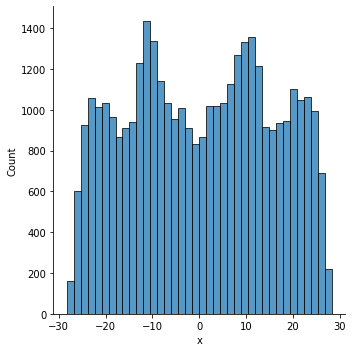

In [5]:
#Let's visualize the distribution of the x coordinates
fig = sns.displot(df.x, kde=False)
plt.show()

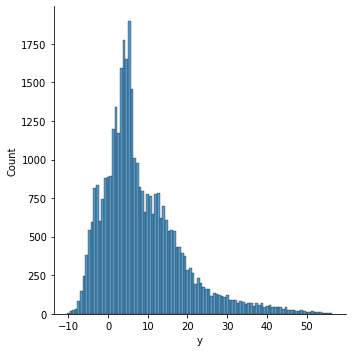

In [6]:
#Now the y coordinate
fig = sns.displot(df.y, kde=False)
plt.show()

### Default Jointplot

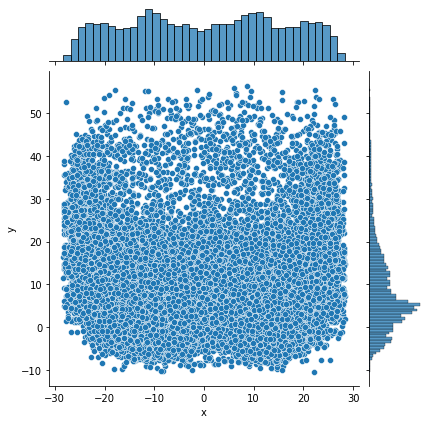

In [7]:
fig = sns.jointplot(x='x', y='y', data=df)
plt.show()

### Jointplot with hex

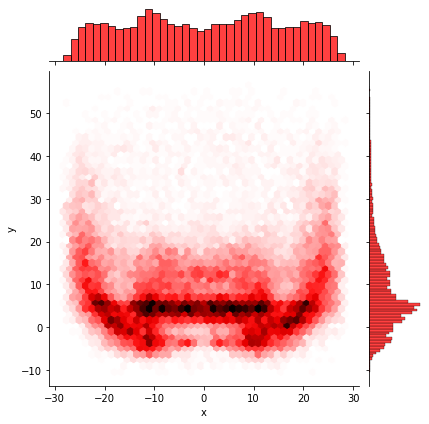

In [8]:
fig = sns.jointplot(x='x', y='y', data=df, kind='hex', color='red')
plt.show()

### Jointplot with kernel density estimate (KDE)

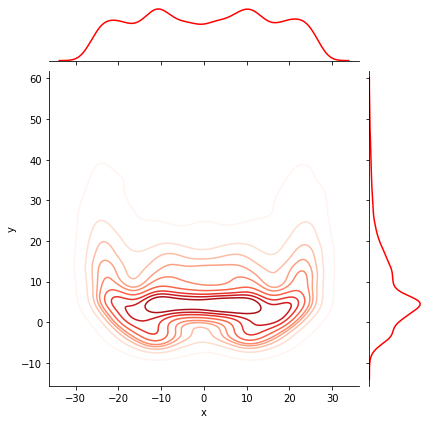

In [9]:
fig = sns.jointplot(x='x', y='y', data=df, kind='kde', cmap='Reds', color='red')
plt.show()

### Side-by-side Jointplots

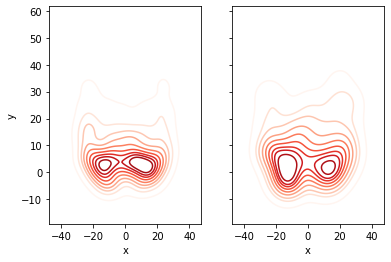

In [10]:
#prepare our two plots - no reason to separate out our axes here as we want to compare these two players on an equal scale so we set sharex and sharey to true
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)

#First, we'll partition the data to the player we are looking for
qb_name = 'Carr' #I'm being intentional vague here and not listing the full player name, because many player names listed on Next Gen Stats are different than you're likely accustomed to. So, I've found this method easire to ensure I get the player data
qb = df.loc[(df['name'].str.contains(qb_name))]
#Assign this plot to the first (0-index) axis. Not going to use the univariate distributions on the axes for these plots as they don't work well as subplots
sns.kdeplot(data=qb, x=qb.x, y=qb.y, ax=ax[0], cmap='Reds')

#Let's get player 2
qb_name = 'Murray'
qb = df.loc[(df['name'].str.contains(qb_name))]
#Second plot
sns.kdeplot(data=qb, x=qb.x, y=qb.y, ax=ax[1], cmap='Reds')
plt.show()

### Side-by-side Jointplots overlaying field mockup

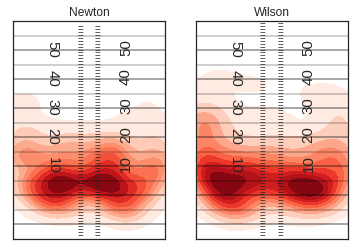

In [11]:
#Layering two plotting styles here to get a big, clean, but dark background look
plt.style.use('seaborn-ticks')
# plt.style.use('default')

#Set up our subplots
fig, (ax1, ax2) = plt.subplots(1,2)

qb_name = 'Newton'
qb = df.loc[(df['name'].str.contains(qb_name))]

#What we've added here is shading for the densities, but leaving the lowest density area unshaded.
#I've also added the *n_level* parameter, which allows us to choose how many levels we want to have in our contour. The higher the number here, the smoother the plot will look.
sns.kdeplot(data=qb, x=qb.x, y=qb.y, ax=ax1, cmap='Reds', shade=True, thresh=0.05, n_levels=10)

#Set title, remove ticks and labels
ax1.set_title(qb_name)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])

#Remove any part of the plot that is out of bounds
ax1.set_xlim(-53.3333/2, 53.3333/2)

#This makes our scales (x and y) equal (1 pixel in the x direction is the same 'distance' in coordinates as 1 pixel in the y direction)
ax1.set_ylim(-15,60)

#Plot all of the field markings (line of scrimmage, hash marks, etc.)
for j in range(-15,60-1,1):
    ax1.annotate('--', (-3.1,j-0.5), ha='center',fontsize =10)
    ax1.annotate('--', (3.1,j-0.5), ha='center',fontsize =10)
for i in range(-10,60,5):
    ax1.axhline(i,c='k',ls='-',alpha=0.25, lw=1.5)
for i in range(-10,60,10):
    ax1.axhline(i,c='k',ls='-',alpha=0.25, lw=1.5)
for i in range(10,60-1,10):
    ax1.annotate(str(i), (-12.88,i-1.15), ha='center', fontsize=15, rotation=270)
    ax1.annotate(str(i), (12.88,i-0.65), ha='center', fontsize=15, rotation=90)


#Now we just repeat for player 2.
qb_name = 'Wilson'
qb = df.loc[(df['name'].str.contains(qb_name))]
#Second plot
sns.kdeplot(data=qb, x=qb.x, y=qb.y, ax=ax2, cmap='Reds', shade=True, thresh=0.05, n_levels=10)

ax2.set_title(qb_name)
ax2.set_xlabel('')
ax2.set_ylabel('')

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlim(-53.3333/2, 53.3333/2)
ax2.set_ylim(-15,60)

# Makes field markings
for j in range(-15,60,1):
    ax2.annotate('--', (-3.1,j-0.5), ha='center',fontsize =10)
    ax2.annotate('--', (3.1,j-0.5), ha='center',fontsize =10)
    
for i in range(-10,60,5):
    ax2.axhline(i,c='k', ls='-', alpha=0.25, lw=1.5)
    
for i in range(-10,60,10):
    ax2.axhline(i,c='k', ls='-', alpha=0.25, lw=1.5)
    
for i in range(10,60-1,10):
    ax2.annotate(str(i), (-12.88,i-1.15), ha='center', fontsize=15, rotation=270)
    ax2.annotate(str(i), (12.88,i-0.65), ha='center', fontsize=15, rotation=90)

plt.show()

## Defining your custom function
- This custom function should pass:
  - Name of qb1
  - Name of qb2 
  - Filter df to a specific season
  - Select your desired colormap option

In [12]:
def my_area(side1, side2):
  area = side1 * side2
  print(area)

my_area(4, 10)
my_area(3, 8)


40
24


In [13]:
def qb_compare(qb1, qb2, season, cmap):
  #Layering two plotting styles here to get a big, clean, but dark background look
  df = pd.read_csv('https://raw.githubusercontent.com/ArrowheadAnalytics/next-gen-scrapy-2.0/master/pass_and_game_data.csv', low_memory=False)
  plt.style.use('seaborn-ticks')
  # plt.style.use('default')
  df = df[df['season'] == season]
  #Set up our subplots
  fig, (ax1, ax2) = plt.subplots(1,2)

  qb_name = qb1
  qb = df.loc[(df['name'].str.contains(qb_name))]

  #What we've added here is shading for the densities, but leaving the lowest density area unshaded.
  #I've also added the *n_level* parameter, which allows us to choose how many levels we want to have in our contour. The higher the number here, the smoother the plot will look.
  sns.kdeplot(data=qb, x=qb.x, y=qb.y, ax=ax1, cmap=cmap, shade=True, thresh=0.05, n_levels=10)

  #Set title, remove ticks and labels
  ax1.set_title(qb_name)
  ax1.set_xlabel('')
  ax1.set_ylabel('')
  ax1.set_xticks([])
  ax1.set_yticks([])

  #Remove any part of the plot that is out of bounds
  ax1.set_xlim(-53.3333/2, 53.3333/2)

  #This makes our scales (x and y) equal (1 pixel in the x direction is the same 'distance' in coordinates as 1 pixel in the y direction)
  ax1.set_ylim(-15,60)

  #Plot all of the field markings (line of scrimmage, hash marks, etc.)
  for j in range(-15,60-1,1):
      ax1.annotate('--', (-3.1,j-0.5), ha='center',fontsize =10)
      ax1.annotate('--', (3.1,j-0.5), ha='center',fontsize =10)
  for i in range(-10,60,5):
      ax1.axhline(i,c='k',ls='-',alpha=0.25, lw=1.5)
  for i in range(-10,60,10):
      ax1.axhline(i,c='k',ls='-',alpha=0.25, lw=1.5)
  for i in range(10,60-1,10):
      ax1.annotate(str(i), (-12.88,i-1.15), ha='center', fontsize=15, rotation=270)
      ax1.annotate(str(i), (12.88,i-0.65), ha='center', fontsize=15, rotation=90)


  #Now we just repeat for player 2.
  qb_name = qb2
  qb = df.loc[(df['name'].str.contains(qb_name))]
  #Second plot
  sns.kdeplot(data=qb, x=qb.x, y=qb.y, ax=ax2, cmap=cmap, shade=True, thresh=0.05, n_levels=10)

  ax2.set_title(qb_name)
  ax2.set_xlabel('')
  ax2.set_ylabel('')

  ax2.set_xticks([])
  ax2.set_yticks([])

  ax2.set_xlim(-53.3333/2, 53.3333/2)
  ax2.set_ylim(-15,60)

  # Makes field markings
  for j in range(-15,60,1):
      ax2.annotate('--', (-3.1,j-0.5), ha='center',fontsize =10)
      ax2.annotate('--', (3.1,j-0.5), ha='center',fontsize =10)
      
  for i in range(-10,60,5):
      ax2.axhline(i,c='k', ls='-', alpha=0.25, lw=1.5)
      
  for i in range(-10,60,10):
      ax2.axhline(i,c='k', ls='-', alpha=0.25, lw=1.5)
      
  for i in range(10,60-1,10):
      ax2.annotate(str(i), (-12.88,i-1.15), ha='center', fontsize=15, rotation=270)
      ax2.annotate(str(i), (12.88,i-0.65), ha='center', fontsize=15, rotation=90)

  plt.show()

## Calling your custom function (with Brady, Mahomes, 2018, colormap of your choice)

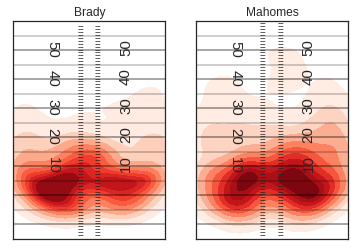

In [14]:
qb_compare("Brady", "Mahomes", 2018, "Reds")

## Calling your custom function (with Brady, Mahomes, 2019, colormap of your choice)

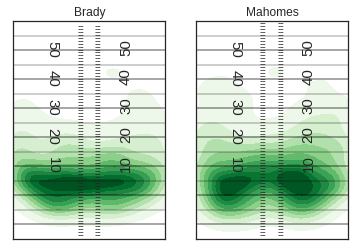

In [15]:
qb_compare("Brady", "Mahomes", 2019, "Greens")

In [16]:
df.name.unique()

array(['Joseph Flacco', 'Lamar Jackson', 'Robert Griffin', 'Tyrod Taylor',
       'Nathan Peterman', 'Joshua Allen', 'Derek Anderson',
       'Matthew Barkley', 'Cameron Newton', 'Taylor Heinicke',
       'Kyle Allen', 'Will Grier', 'Michael Glennon', 'Mitchell Trubisky',
       'William Daniel', 'Andrew Dalton', 'Jeffrey Driskel',
       'Ryan Finley', 'DeShone Kizer', 'Kevin Hogan', 'Cody Kessler',
       'Baker Mayfield', 'Trevor Siemian', 'Brock Osweiler',
       'Paxton Lynch', 'Casey Keenum', 'Drew Lock', 'Brandon Allen',
       'Aaron Rodgers', 'Brett Hundley', 'Robby Bortles', 'Nick Foles',
       'Gardner Minshew', 'Alexander Smith', 'Patrick Mahomes',
       'Matt Moore', 'Derek Carr', 'Erik Manuel', 'Philip Rivers',
       'Jared Goff', 'Sean Mannion', 'Jay Cutler', 'David Fales',
       'Ryan Tannehill', 'Ryan Fitzpatrick', 'Joshua Rosen', 'Tom Brady',
       'Elisha Manning', 'Odell Beckham', 'Daniel Jones', 'Joshua McCown',
       'Bryce Petty', 'Sam Darnold', 'Luke Falk'

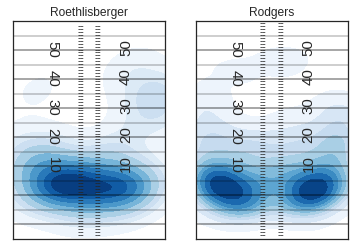

In [17]:
qb_compare("Roethlisberger", "Rodgers", 2019, "Blues")

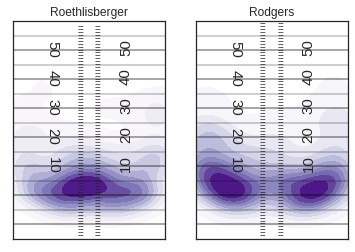

In [18]:
qb_compare("Roethlisberger", "Rodgers", 2018, "Purples")